# Lab 05 - Data Visualization I

Name: Andrew Hawk  
Class: CSCI 349 - Intro to Data Mining  
Semester: 2020SP  
Instructor: Brain King  

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
print("np version:",np.__version__)
print("pd version:",pd.__version__)
print("mpl version:",mpl.__version__)
print("sns version:",sns.__version__)

np version: 1.18.1
pd version: 0.25.3
mpl version: 3.1.1
sns version: 0.9.0


### 1) [M] Read https://matplotlib.org/tutorials/introductory/usage.html only up to the section titled Backends. (NOTE: at the end, you will read about a Jupyter widget library called ipympl. Do NOT install this! Skip these instructions!) Then, summarize the following important parts of a plot:
###    a. Figure
The whole figure. Keeps track of all child axes, special artists (titles, figue legends, etc), and the canvas. A figure can have any number of Axes.
###    b. Axes
The region of the image with the data space - think of this as a plot. A given axes object can only be in one figure. The Axes object contains two or three axis objects. Each axes has a title and labels for each axis. 
###    c. Axis
These are the number-line-like objects. They set the graph limits and generate the ticks and ticklabels. Location of ticks is determined by a Locator object. Ticklabel strings are formatted by a Formatter. 
###    d. Artist
Basically everything you can see on the figure is an artist. This includes figure, axes, axis, text, Line2d, collection, patch, ... objects. When the figure is rendered, all of the artists are drawn to the canvas. Most artists are tied to an Axes -this artists cannot be shared by multiple axes.

### 2) [P] Set the seed of numpy's RNG to 10 with the following: np.random.seed(10)

In [2]:
np.random.seed(10)

### 3) [P] Create a dataframe named df_uniform that contains 1000 observations. It should have two variables, named x and y. For each observation, x should be generated from a uniform distribution between 10 and 90, and y should be generated from a uniform between 20 and 80. Show the head() of the dataframe.

In [3]:
df_uniform = pd.DataFrame({'x': 10+np.random.random(1000)*80, 'y': 20+np.random.random(1000)*60})
df_uniform.head()


,x,y
0,71.705651,40.899795
1,11.660156,68.537772
2,60.691859,47.578231
3,69.904311,57.567458
4,49.880561,32.218810


### 4) [M] What is a scatterplot? What does it show? What type of data is it used for? Is it good for one variable, or more?

A scatterplot displays the relationship between 2 numeric variables. For each data point, the value of its first variable is represented on the X axis, the second on the Y axis. A scatter plot attempts to show how much one variable is affected by another. 




### 5) [P] Generate a scatterplot of the data using matplotlib's scatter method. The tutorial and examples for matplotlib have plenty of examples that are very close to what you need. Your plot must:
### a. Have a title
### b. Label both axes with "x" and "y" respectively
### c. Change the x and y axis to display between 0 and 100
### d. Change the default point size
### e. Change the default color of the point
### f. Display a grid

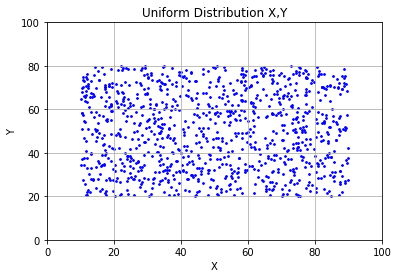

In [4]:
plt.scatter(df_uniform.x, df_uniform.y, s=3, c="#0000ff") # c = "blue"
plt.title("Uniform Distribution X,Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid()

### 6) [P] Generate a data frame called df_normal with 1000 observations, two variables names x and y again. This time, x should be generated from a normal distribution with mean 50 and standard deviation 15, and y with mean 50 and standard deviation 5. Again, show the head() of df_normal.

In [5]:
df_normal = pd.DataFrame({'x':np.random.normal(loc=50,scale=15,size=1000), 'y':np.random.normal(loc=50,scale=5,size=1000)})
df_normal.head()

,x,y
0,71.182357,49.123879
1,56.954296,54.579597
2,30.306787,47.688809
3,53.658082,50.707723
4,71.580015,51.934152


### 7) [P] Repeat your scatterplot above with df_normal . Use a different color point, and title your plot accordingly.

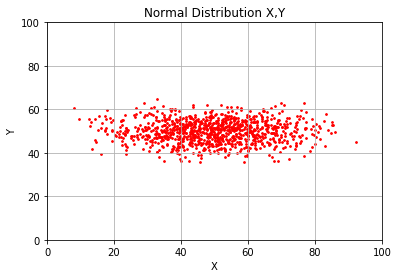

In [6]:
plt.scatter(df_normal.x, df_normal.y, s=3, c="#ff0000") # c = "magenta"
plt.title("Normal Distribution X,Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid()

### 8) [P] Generate a single figure that contains two axes that are adjacent to each other. You should have:
### a. at least one shared axis
### b. appropriate axis labels
### c. make the range of the axis on both plots the same
### d. display a legend on each to be sure both are labeled correctly as "normal" or "uniform"
### e. One title at the top

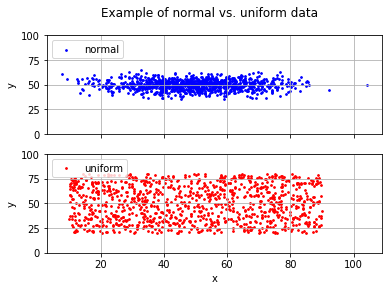

In [7]:
# Reference: https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
# Reference: https://matplotlib.org/api/axes_api.html
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle("Example of normal vs. uniform data")
axs[0].scatter(df_normal.x, df_normal.y, s=3, c="blue", label="normal")
axs[1].scatter(df_uniform.x, df_uniform.y, s=3, c="red", label="uniform")
axs[0].set(ylabel="y", ylim=(0,100))
axs[1].set(xlabel="x", ylabel="y", ylim=(0,100))
for ax in axs.flat:
    ax.legend(loc="upper left")
    ax.grid()
#axs[0].ylim(0,100)
#axs[0].set(ylabel="y")
#axs[1].set(xlabel="x",ylabel="y")

### 9) [P] Display both df_uniform and df_normal on one shared plot, with an appropriate legend

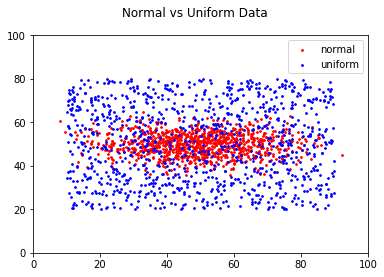

In [8]:
# Ref: https://stackoverflow.com/questions/4270301/matplotlib-multiple-datasets-on-the-same-scatter-plot
fig, axs = plt.subplots(1)
fig.suptitle("Normal vs Uniform Data")
axs.scatter(df_normal.x, df_normal.y, s=3, label="normal", c="r")
axs.scatter(df_uniform.x, df_uniform.y, s=3, label="uniform", c="b")
axs.set(xlim=(0,100), ylim=(0,100))
axs.legend()

### 10) [M] What is a histogram? In your answer, in addition to defining it, please clearly indicate what type of data its good for, and whether it's good for one variable or to show relationships between multiple variables.

A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observations per bin is represented by the height of the bar. It is posible to represent the distribution of several variables on the same axis using this technique. Histograms are used to show distributions of variables.


### 11) [P] The pandas DataFrame class has a useful interface to matplotlib that will help you generate some quick plots as you explore your data. To get you started, generate a histogram of both the x and y variables for df_uniform. Use 30 bins, and set the range of both variables to be 0 – 100. Repeat this exercise on df_normal. (HINT:Use the hist() method of DataFrame.)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227398F7988>,
      dtype=object)

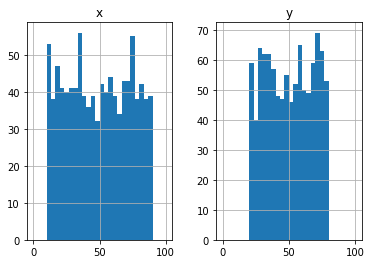

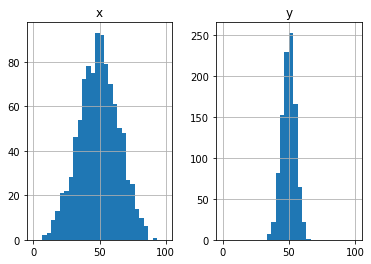

In [9]:
df_uniform.hist(bins=30, range=(0,100))
df_normal.hist(bins=30, range=(0,100))

### 12) [M] What is a quantile?

Quantiles are cut points dividing the range of a probability distribution into continuos intervals with equal probabilities. 


### 13) [M] In terms of quantiles, what is a quartile? What about a percentile? What is an Inter-quartile range (IQR)?

A quartile is a type of quantile that divides the data into 4 segments. Percentile is a type of quantile that divides the data into 100 equal segments. The Inter-quartile range is the distance between the 25th and 75th percentiles. 


### 14) [M, P] Read about the quantile() method for data frames, and use it to numerically show the 25th, median, and 75th percentiles, and compute the IQR (Inter-quartile range) for both variables, on both data frames. Compare and contrast.

The IQRs for the uniform distributions are greater than those of the normal distributions. The medians are very similar. 


In [10]:
uniform = df_uniform.quantile([.25,.5,.75])
normal = df_normal.quantile([.25,.5,.75])
display(uniform)
display(normal)
display("IQR normal_x: {}".format(normal.iloc[2,0]-normal.iloc[0,0]))
display("IQR normal_y: {}".format(normal.iloc[2,1]-normal.iloc[0,1]))
display("IQR uniform_x: {}".format(uniform.iloc[2,0]-uniform.iloc[0,0]))
display("IQR uniform_y: {}".format(uniform.iloc[2,1]-uniform.iloc[0,1]))

,x,y
0.25,29.101179,34.537015
0.50,49.646841,50.428786
0.75,70.362502,66.256670


,x,y
0.25,39.377233,46.483046
0.50,49.280199,50.100092
0.75,59.737851,53.414954


'IQR normal_x: 20.36061734718927'

'IQR normal_y: 6.931907772418164'

'IQR uniform_x: 41.26132305150755'

'IQR uniform_y: 31.719655183129973'

### 15) [M] There are many ways to define what we mean by an outlier. A very common technique is known as the IQR rule for outliers. What is a definition of an outlier in terms of IQR? (Your answer should use 1.5 * IQR .)

An outlier of any data point is more than 1.5 interquartile ranges below the first quartile or below the third quartile.

### 16) [P] Write a function called IQR_outlier_limits that takes a dataframe as input, and computes the minimum and maximum outlier thresholds for each variable (numeric only assumed), stored in a data frame that is returned as a result.

In [11]:
def IQR_outlier_limits(df):
    returnDF = df.quantile([0.25,0.75])
    for i in range(df.shape[1]):
        IQR = returnDF.iloc[1,i] - returnDF.iloc[0,i]
        returnDF.iloc[0,i] = returnDF.iloc[0,i] - 1.5*IQR
        returnDF.iloc[1,i] = returnDF.iloc[1,i] + 1.5*IQR
    returnDF.index = ["min outlier thresholds","max outlier thresholds"]
    return returnDF

### 17) Use your function you defined above to determine the outliers for df_normal and df_uniform, if any. (HINT: You should get at least a few outliers for df_normal)

In [12]:
# THIS CODE USED TO WORK, BUT NOW I AM GETTING AN ERROR


out_normal = IQR_outlier_limits(df_normal)
out_uniform = IQR_outlier_limits(df_uniform)
out_normal.x.iloc[1]
print("normal x outliers:")
display(df_normal[(df_normal.iloc[:,0] > out_normal.x.iloc[1]) | (df_normal.iloc[:,0] < out_normal.x.iloc[0])].x)
print("normal y outliers:")
display(df_normal[(df_normal.iloc[:,1] > out_normal.y.iloc[1]) | (df_normal.iloc[:,1] < out_normal.y.iloc[0])].y)
print("uniform x outliers:")
display(df_uniform[(df_uniform.iloc[:,0] > out_uniform.x.iloc[1]) | (df_uniform.iloc[:,0] < out_uniform.x.iloc[0])].x)
print("uniform y outliers:")
display(df_uniform[(df_uniform.iloc[:,1] > out_uniform.y.iloc[1]) | (df_uniform.iloc[:,1] < out_uniform.y.iloc[0])].y)

normal x outliers:


630    104.137411
844     92.292830
969      7.917264
Name: x, dtype: float64

normal y outliers:


41     35.688092
119    35.852661
758    64.735494
Name: y, dtype: float64

uniform x outliers:


Series([], Name: x, dtype: float64)

uniform y outliers:


Series([], Name: y, dtype: float64)

### 18) [M] What is a box plot? (A.k.a boxplot, box-and-whisker plot). In your answer, please clearly indicate what it is, what type of data its good for, and whether it's good for one variable or to show relationships between multiple variables.

A boxplot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers (located at the end of each whisker). 

### 19) [P] Again, use the DataFrame plotting interface to generate a box plot on both x and y variables of both df_uniform and df_normal.

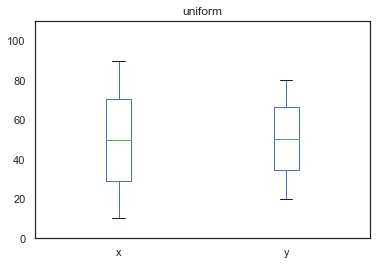

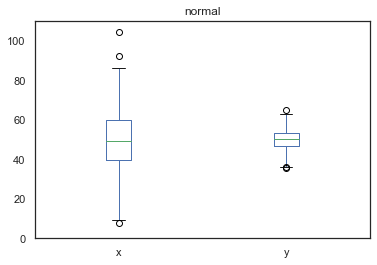

In [127]:
df_uniform.plot.box(title="uniform", ylim=(0,110))
df_normal.plot.box(title="normal", ylim=(0,110))

### 20) [M] From your understanding of a box plot, summarize the distribution of these data, comparing the uniform and the normal distributed data. You should be using the correct terminology, meaning, interpreting the box plot results in terms of quartiles, outliers, etc.

Ref: https://www.simplypsychology.org/boxplots.html

Both plots have similar medians and have a normal distribution. The IQR of both uniform variables is greater than those of both normal variables. The uniform distribution does not have any outlires. The normal distribution has a few outliers (shown as the circles).

### 21) [M] What is a density plot? In your answer, please clearly indicate what it is, the type of data you use it for, and whether it's good for one variable or to show relationships between multiple variables.

A density plot is good for 2 quantitative variables. It is a 2d representation of a joint distribution. It counts the number of observations within a particular area of the 2d space and represents it using square, hexagon, or kernel density estimation.

### 22) [P] Generate a density plot for both x and y variables of both df_uniform and df_normal.

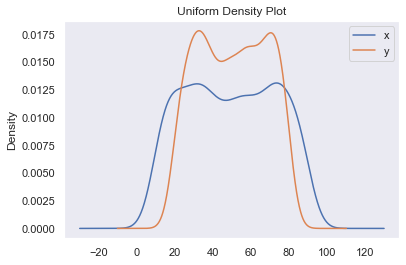

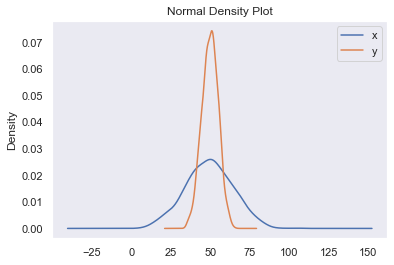

In [237]:
df_uniform.plot.density(title="Uniform Density Plot")
df_normal.plot.density(title="Normal Density Plot")

### 23) [M] Interpret the density plot results

The results of these density plots are easy to interpret. These plots are the PDFs for each distribution. The uniform plots have a somewhat uniform shape. A perfect uniform shape is a rectangle. The normal plots look like a bell curve, which is what we should expect.

### 24) [P] Go back to the describe() method you learn about in previous labs. Show the results of describe() for both data frames. This stills you much information about the distribution of the data.

In [238]:
display(df_uniform.describe())
display(df_normal.describe())

,x,y
count,1000.000000,1000.000000
mean,49.360418,50.311108
std,23.361352,17.612472
min,10.140772,20.018029
25%,29.101179,34.537015
50%,49.646841,50.428786
75%,70.362502,66.256670
max,89.891129,79.999388


,x,y
count,1000.000000,1000.000000
mean,49.376425,49.879051
std,14.934762,5.134885
min,7.917264,35.688092
25%,39.377233,46.483046
50%,49.280199,50.100092
75%,59.737851,53.414954
max,104.137411,64.735494


### 25) [M] What is a quantile-quantile plot (Q-Q plot)? (Wikipedia provides a good answer for this one https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot )

Compares two probability distributions by plotting their quantiles against each other. First, the set of intervals for the quantiles is chosen. If th two distributions being compares are similar, the points in the Q-Q plot will approximately lie on the line y=x.


### 26) [P] Load the scipy.stats package as stats. Look up the API and read about the probplot function. (See http://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot ) This can generate a Q-Q plot for you quite easily. Generate a Q-Q plot for a sample of 100 points from the x-variable df_uniform. Do the same for df_normal. For illustrative purposes, assume your distribution is normal for both plots (even though we know it is not!)

Text(0.5, 0.9, 'Q-Q Normal')

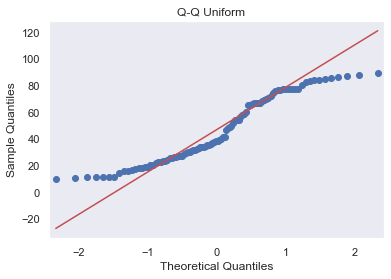

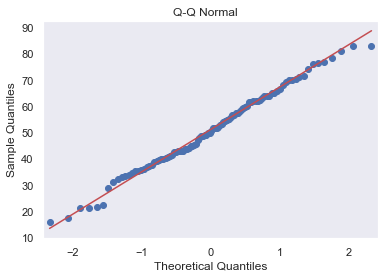

In [239]:
import scipy.stats as stats
import statsmodels.api as sm
# Ref: https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
fig_uniform = sm.qqplot(df_uniform.x.sample(100), line='q')
fig_uniform.text(0.5,0.9, "Q-Q Uniform", horizontalalignment='center')
fig_normal = sm.qqplot(df_normal.x.sample(100), line='q')
fig_normal.text(0.5,0.9, "Q-Q Normal", horizontalalignment='center')

### 27) [M] Compare and contrast your resulting plot. Does the output suggest that one is indeed normally distributed, and the other is not?

The Q-Q Normal plot suggests that the data is normally distributed since the blue data line is very similar to the red quantile line. However, the Q-Q Uniform plot suggests that the data is not normally distibuted.


### 28) [P] Repeat the experiment, showing a Q-Q plot for 100 samples of each dataset. However, now assume the distribution is uniform.

Text(0.5, 0.9, 'Q-Q Normal')

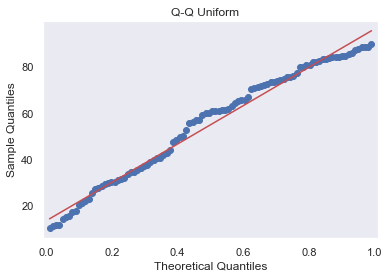

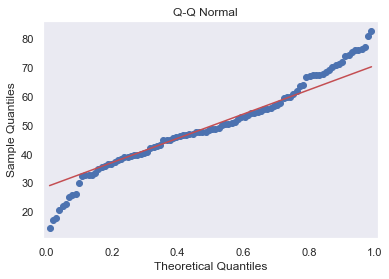

In [240]:
fig_uniform = sm.qqplot(df_uniform.x.sample(100), line='q', dist=stats.distributions.uniform)
fig_uniform.text(0.5,0.9, "Q-Q Uniform", horizontalalignment='center')
fig_normal = sm.qqplot(df_normal.x.sample(100), line='q', dist=stats.distributions.uniform)
fig_normal.text(0.5,0.9, "Q-Q Normal", horizontalalignment='center')

### 29) Again, compare the plots. Does the output suggest one is indeed normally distributed and the other is not?

The Q-Q Uniform plot suggests that the data is uniformally distributed since the blue data points closely align with the red quantile line. The Q-Q Uniform plot's blue data points do not closely align with the red quantile line towards the edges. For the Q-Q Uniform plot, I assumed the blue data would align more closely with the quantile line. I found that as I increase the sample size, the data becomes increasingly more aligned with the quantile line.

### 30) [P] Show a single scatterplot of df_normal using sns. Change the default color and point type that is used in the plot.

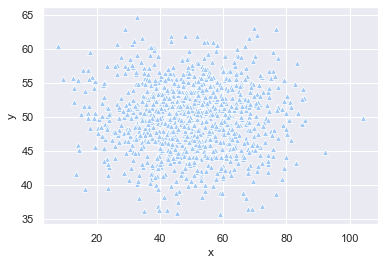

In [245]:
# Ref: https://chrisalbon.com/python/data_wrangling/pandas_with_seaborn/
# Ref: https://www.codecademy.com/articles/seaborn-design-ii
# Ref: https://stackoverflow.com/questions/27005783/changing-color-and-marker-of-each-point-using-seaborn-jointplot/27007802
# Ref: https://elitedatascience.com/python-seaborn-tutorial
sns.set()
sns.set_palette("pastel")
sns.scatterplot(x="x", y="y", data=df_normal, marker='^')
#plt.xlim(0,100)
#plt.ylim(0,100)

### 31) [P] Show a scatterplot of both df_uniform and df_normal side by side on the same figure

Text(0.5, 1.0, 'Normal')

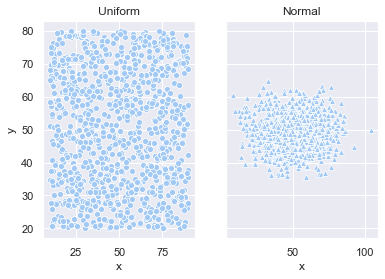

In [246]:
f, axes = plt.subplots(1,2, sharey=True)

sns.set()
colors = ['#FF0000']
sns.set_palette(colors)
sns.scatterplot(x="x", y="y", data=df_uniform, marker='o', ax=axes[0]).set_title("Uniform")
sns.scatterplot(x="x", y="y", data=df_normal, marker='^', ax=axes[1]).set_title("Normal")

### 32) [P] Show the distribution of only the x variable for both df_uniform and df_normal, with a density curve and a rugplot at the bottom. (Look at sns.distplot)

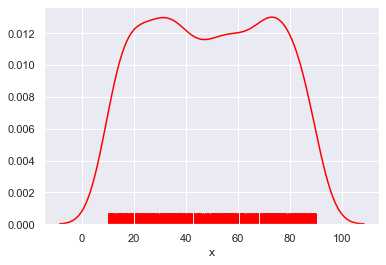

In [247]:
sns.distplot(df_uniform.x, color = "red", rug=True, hist=False)

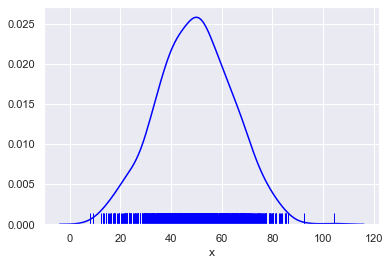

In [248]:
sns.distplot(df_normal.x, color = "blue", rug=True, hist=False)

### 33) [M] What is a jointplot in Seaborn?

A jointplot allows us to create a plot of two variables with bivaraite and univariate graphs. Basically, we create a main plot based on two variables, and each axis has a plot only depending on one variable.

### 34) [P] Use sns.jointplot to show the bivariate distribution of x and y for df_uniform and df_normal

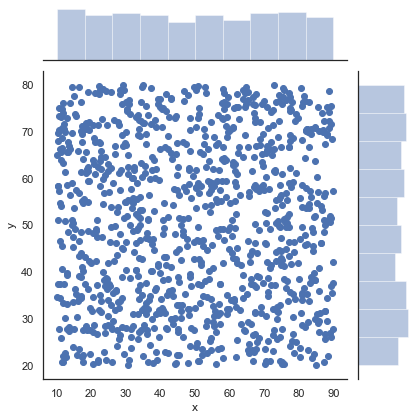

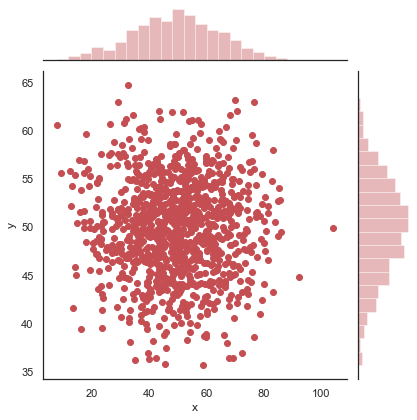

In [249]:
sns.set(style="white")
sns.jointplot(x="x", y="y", data=df_uniform, color = "b")
sns.jointplot(x="x", y="y", data=df_normal, color = "r")

### 35) [P] Show a hexbin plot using sns.jointplot for df_normal

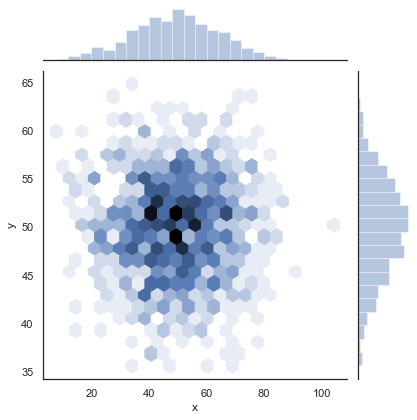

In [250]:
sns.jointplot(x="x", y="y", data=df_normal, kind="hex")

### 36) [P] Create an additional variable in df_uniform called x_fac1 that represents a factor with 3 levels, "X1", "X2", and "X3". You should discretize according to equal width bins over the distribution of x. (Divide the range of x into three.)

In [251]:
# Ref: https://pbpython.com/pandas-qcut-cut.html

range = df_uniform.x.max() - df_uniform.x.min()
X1 = df_uniform.x.min() + range/3
X2 = X1 + range/3
X3 = X2 + range/3
df_uniform["x_fac1"] = pd.cut(df_uniform.x, bins = [df_uniform.x.min(), X1, X2, X3], include_lowest=True, labels = ["X1", "X2", "X3"])
df_uniform.head()

,x,y,x_fac1
0,71.705651,40.899795,X3
1,11.660156,68.537772,X1
2,60.691859,47.578231,X2
3,69.904311,57.567458,X3
4,49.880561,32.218810,X2


### 37) [P] Create an additional variable in df_uniform called x_fac2 that represents a factor with 3 levels, "X1", "X2", and "X3". This time, you should discretize using equal depth bins over the distribution of x. Select your division criteria such that there are an equal number of data in each bin. Verify that the distribution of your data each has the same number of data (within 1).

In [252]:
# Ref: https://pbpython.com/pandas-qcut-cut.html
display(pd.qcut(df_uniform.x, q=3, labels = ["X1", "X2", "X3"]).value_counts())
df_uniform["x_fac2"] = pd.qcut(df_uniform.x, q=3, labels = ["X1", "X2", "X3"])
df_uniform.head()

X1    334
X3    333
X2    333
Name: x, dtype: int64

,x,y,x_fac1,x_fac2
0,71.705651,40.899795,X3,X3
1,11.660156,68.537772,X1,X1
2,60.691859,47.578231,X2,X2
3,69.904311,57.567458,X3,X3
4,49.880561,32.218810,X2,X2


### 38) [P] Create a side by side scatter plot showing the distribution of df_uniform, using x_fac1 as the color for one plot, and x_fac2 as the color for your other plot.

Text(0.5, 1.0, 'Hue = x_fac2')

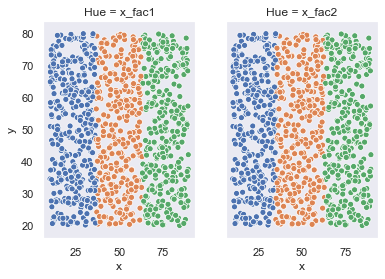

In [254]:
f, axes = plt.subplots(1,2, sharey=True)
sns.set(style="dark")
sns.scatterplot(x="x", y="y", data=df_uniform, hue=df_uniform.x_fac1, ax=axes[0], legend = False).set_title("Hue = x_fac1")
sns.scatterplot(x="x", y="y", data=df_uniform, hue = df_uniform.x_fac2, ax=axes[1], legend = False).set_title("Hue = x_fac2")